## Import

In [1]:
%pip install opendatasets
%pip install kaggle

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np

In [3]:
od.download('https://www.kaggle.com/datasets/arnavvvvv/netflix-movies-and-tv-shows/data')

Skipping, found downloaded files in "./netflix-movies-and-tv-shows" (use force=True to force download)


In [4]:
df = pd.read_csv('netflix-movies-and-tv-shows/netflix_titles.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.drop('show_id', axis=1, inplace=True)

In [7]:
df.drop('title', axis=1, inplace=True)

In [8]:
df.drop('description', axis=1, inplace=True)

In [9]:
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   director      6173 non-null   object
 2   cast          7982 non-null   object
 3   country       7976 non-null   object
 4   date_added    8797 non-null   object
 5   release_year  8807 non-null   int64 
 6   rating        8803 non-null   object
 7   duration      8804 non-null   object
 8   listed_in     8807 non-null   object
dtypes: int64(1), object(8)
memory usage: 619.4+ KB


In [12]:
# Cari null value
df.isna().sum()

,0
type,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
listed_in,0


In [13]:
df.columns

Index(['type', 'director', 'cast', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in'],
      dtype='object')

## Data Cleansing

In [14]:
cleaned_df = df.dropna()

In [15]:
cleaned_df = cleaned_df[~cleaned_df['duration'].str.contains('Season')]

In [16]:
cleaned_df.isna().sum()

,0
type,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [17]:
#8807 -> 5332, removed 3475 rows
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5185 entries, 7 to 8806
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          5185 non-null   object
 1   director      5185 non-null   object
 2   cast          5185 non-null   object
 3   country       5185 non-null   object
 4   date_added    5185 non-null   object
 5   release_year  5185 non-null   int64 
 6   rating        5185 non-null   object
 7   duration      5185 non-null   object
 8   listed_in     5185 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.1+ KB


In [18]:
cleaned_df.sample(5)

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
7153,Movie,Johnnie To,"Stephen Chow, Anita Mui, Carrie Ng, Wai Ai, Be...",Hong Kong,"August 31, 2018",1992,TV-14,95 min,"Action & Adventure, Comedies, International Mo..."
606,Movie,Stephen Frears,"Helen Mirren, Michael Sheen, James Cromwell, H...","United Kingdom, United States, France, Italy","July 1, 2021",2006,PG-13,103 min,"Dramas, International Movies"
60,Movie,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Satoshi Hino, R...",Japan,"September 15, 2021",2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio..."
5113,Movie,David Ayer,"Will Smith, Joel Edgerton, Noomi Rapace, Lucy ...",United States,"December 22, 2017",2017,TV-MA,118 min,"Action & Adventure, Sci-Fi & Fantasy"
5689,Movie,Benjamin Dickinson,Reggie Watts,United States,"December 6, 2016",2016,TV-MA,62 min,"Music & Musicals, Stand-Up Comedy"


##Data Transformation

In [19]:
##Transform release_year to movie_age
from datetime import date
cleaned_df['movie_age'] = date.today().year - cleaned_df['release_year']

In [20]:
cleaned_df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in,movie_age
7,Movie,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",31
9,Movie,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",3
12,Movie,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",3
24,Movie,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",26
27,Movie,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,14


## Analysis and Visualization

In [21]:
import matplotlib.pyplot as plt

In [22]:
import seaborn as sns

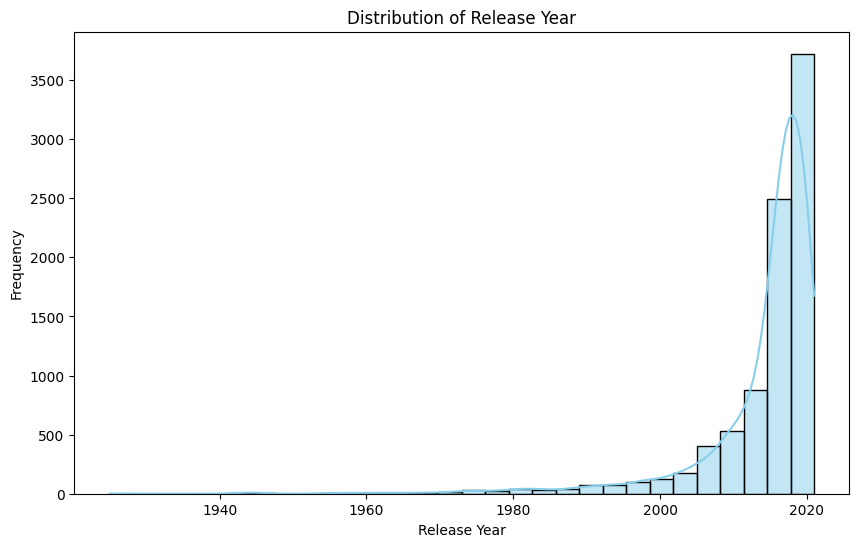

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


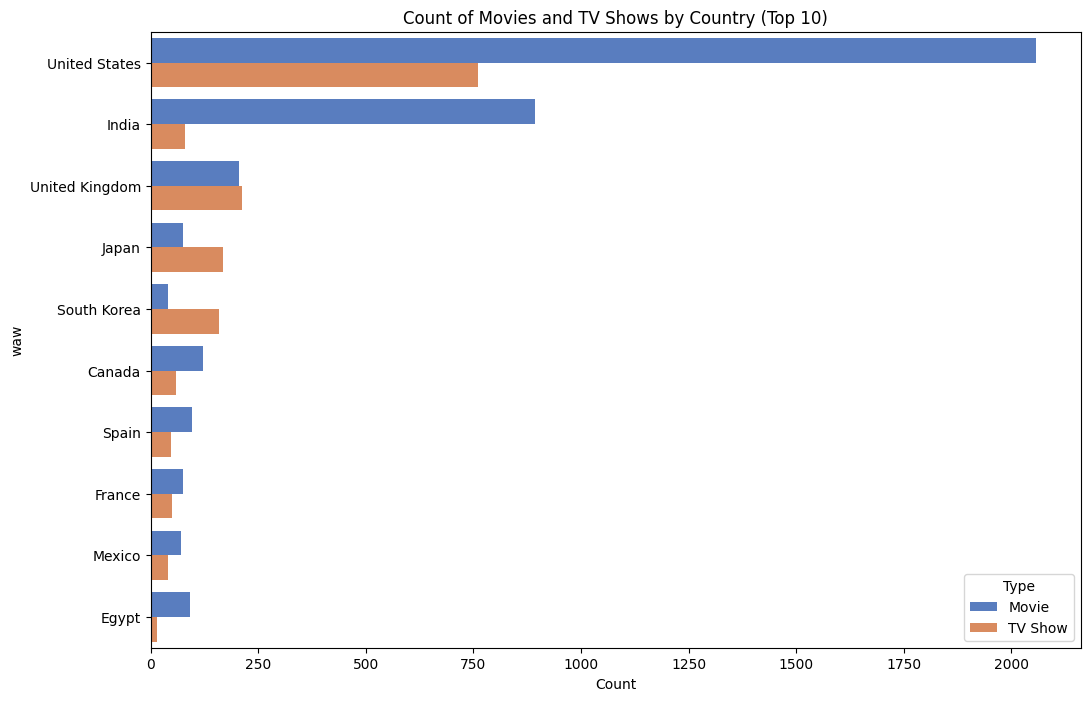

In [24]:
plt.figure(figsize=(12, 8))
sns.countplot(y='country', hue='type', data=df, order=df['country'].value_counts().iloc[:10].index, palette='muted')
plt.title('Count of Movies and TV Shows by Country (Top 10)')
plt.xlabel('Count')
plt.ylabel('waw')
plt.legend(title='Type')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


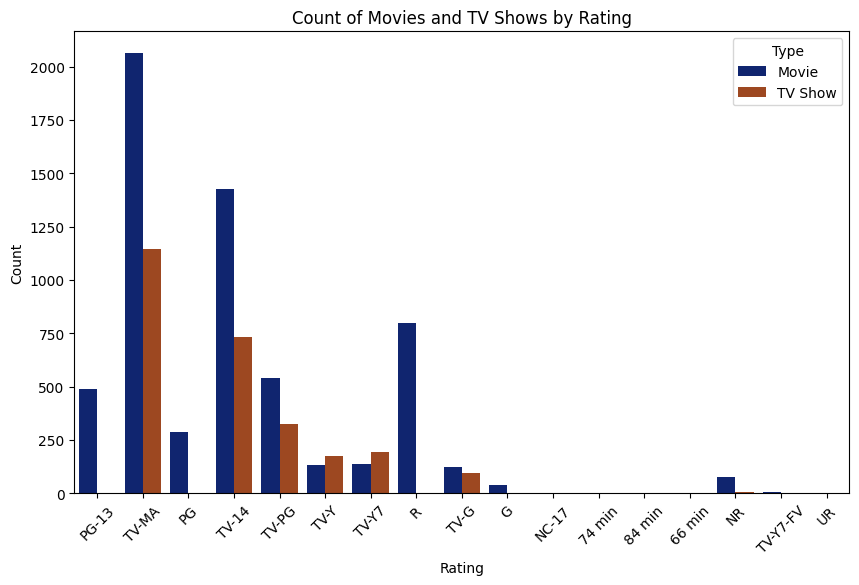

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='type', data=df, palette='dark')
plt.title('Count of Movies and TV Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xticks(rotation=45)
plt.show()